# Midterm Part 1 - _Due Monday, September 19_
---
## Note: this is part of the midterm. It is _not_ a paired programming assignment. **You must complete this lab _on your own_**. 
---
### We'll be exploring the Pokemon dataset from [Kaggle](http://www.kaggle.com).
The dataset was downloaded from https://www.kaggle.com/abcsds/pokemon. 

1. sign up or log in
2. accept terms and conditions (if necessary)
3. download `pokemon.zip`
4. unzip it to your local directory

After loading and cleaning the data:

+ **SQL**: 
    - Which Pokemon seems the most useful (largest `Total` value)?
    - Come up with at least one other question that can be answered using SQL (and answer it).
+ **EDA**: 
    - Calculate the percent of distinct Pokemon that are Legendary (distinct means unique Pokemon `#`).
    - Make at least one barplot of a categorical variable
    - Make at least one boxplot of continuous variables
    - Make at least one boxplot of continuous variables grouped by a categorical variable
+ **EDA/Statistics**: 
    - Calculate the mean and standard deviation of the `total` column for each Pokemon Type 1.
    - Calculate the mean and standard deviation of at least one other continuous variable
+ **Statistics/Random Sampling** - For the following questions, draw a sample of 100:
    - Compare sample statistics & population statistics for Attack points.
    - Make histograms of the Attack points sample & Attack points population.
    - Compare sample statistics & population statistics for at least one other continuous variable.
    - Make histograms of the Attack points sample & at least one other continuous variable in the population.
+ **Probability**: Assume you are a Pokemaster and have caught every Pokemon. You pick 6 Pokemon at random to carry.
     - What's the probability that they are all Water type? (probability of a Pokemon with Type 1 or Type 2 of `Water`)
     - Come up with at least one more scenario for your set of six Pokemon and compute the probability of getting it.

***
## Setup & clean the data
### First, load the packages that will be used in this notebook.

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

random.seed(1234)
sns.set(font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


### Next, load the csv file into a DataFrame and look at the first few lines.

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Here are some variable descriptions from the Kaggle website:

|Variable|Description|
|:-:|:--|
|**#**|ID for each pokemon|
|**Name**|Name of each pokemon|
|**Type 1**|Each pokemon has a type, this determines weakness/resistance to attacks|
|**Type 2**|Some pokemon are dual type and have 2|
|**Total**|sum of all stats that come after this, a general guide to how strong a pokemon is|
|**HP**|hit points, or health, defines how much damage a pokemon can withstand before fainting|
|**Attack**|the base modifier for normal attacks (eg. Scratch, Punch)|
|**Defense**|the base damage resistance against normal attacks|
|**SP. Atk**|special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)|
|**SP. Def**|the base damage resistance against special attacks|
|**Speed**|determines which pokemon attacks first each round|
|**Generation**|the number of the generation a pokemon belongs to
|**Legendary**|boolean value indicating if a pokemon is Legendary (True) or not Legendary (False)|

Notice that there are multiple entries for Pokemon \#3 (Venusaur). We won't be able to set `#` as the index since it contains duplicates.

We can also modify the column names to get rid of periods and spaces. The column names should also be lowercased for use with SQLite.

In [3]:
# Lowercase and replace periods & spaces in the column names
new_names = []

for col in df.columns:
    new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower())

df.columns = new_names

print(df.columns)

Index(['#', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense',
       'spatk', 'spdef', 'speed', 'generation', 'legendary'],
      dtype='object')


Let's also convert `Legendary` to a binary column, where `1` represents `True` and `0` represents `False`.

Python's lambda functions are useful for defining functions in-line. You can read more at:<br>
https://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/<br>
http://stackoverflow.com/questions/890128/why-are-python-lambdas-useful

In [4]:
df['legendary'] = df['legendary'].apply(lambda x: 1 if x == True else 0)
df.head()

,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


### Next, load the data into SQL

First we'll need to create a database, then create a table in our new database.

In [5]:
# Create pokemon table in pokemon database (only run this once!)
engine = create_engine('sqlite:///pokemon.db')
conn = engine.connect()
df.to_sql('pokemon', conn)

In [10]:
%load_ext sql

//anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [11]:
%sql sqlite:///pokemon.db

'Connected: None@pokemon.db'

In [12]:
%%sql
SELECT name FROM sqlite_master WHERE type = "table";

Done.


name
pokemon


In [15]:
%%sql
SELECT name, total FROM pokemon WHERE total = (SELECT MAX(total) FROM pokemon);

Done.


name,total
MewtwoMega Mewtwo X,780
MewtwoMega Mewtwo Y,780
RayquazaMega Rayquaza,780


In [51]:
#per = df[df['legendary'] == 1].count()/df[df['legendary']].count()
#totals = df.groupby('legendary').count()
total_no_legendary = df[df['legendary'] == 0]
total_legendary = df[df['legendary'] == 1]
#totals1u = totals1.groupby('legendary').count()
#totals1.name.count()
#totals0 = df[df['legendary'] == 0]
#totals0.name.count()
#tot = df[df['legendary']]
#tot.name.count()
#totals0.name.count() + totals1.name.count()
#totals1u
#totals
percent_pokemon_legendary = total_legendary.name.count() / (total_legendary.name.count() + total_no_legendary.name.count())

print("Percent of pokemon legendary:", percent_pokemon_legendary)

Percent of pokemon legendary: 0.08125


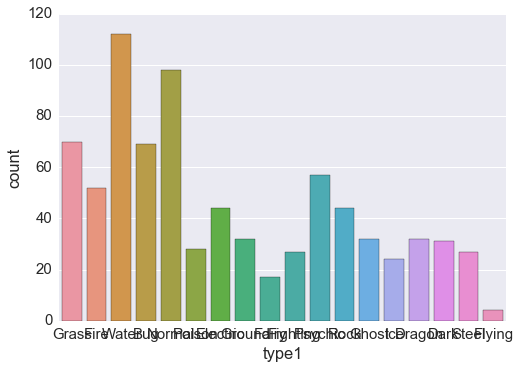

In [74]:
import seaborn as sns
plot_1 = sns.countplot(x='type1', data=df)
plot_1;

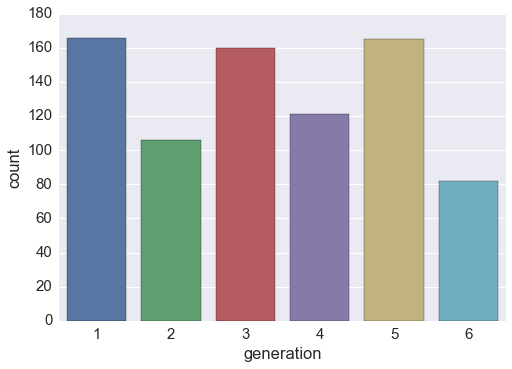

In [64]:
plot_2 = sns.countplot(x='generation', data=df)
plot_2;

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


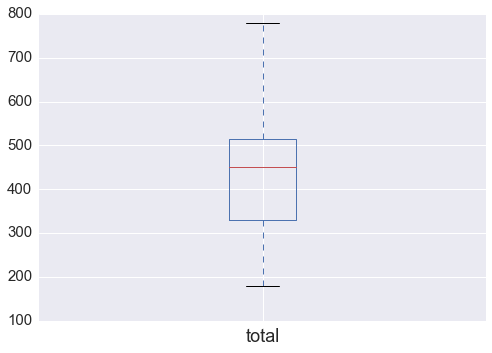

In [62]:
plot_3 = df.boxplot(column='total')
plot_3;

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


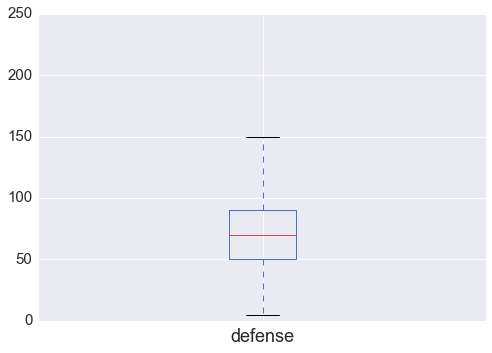

In [65]:
plot_4 = df.boxplot(column='defense')
plot_4;

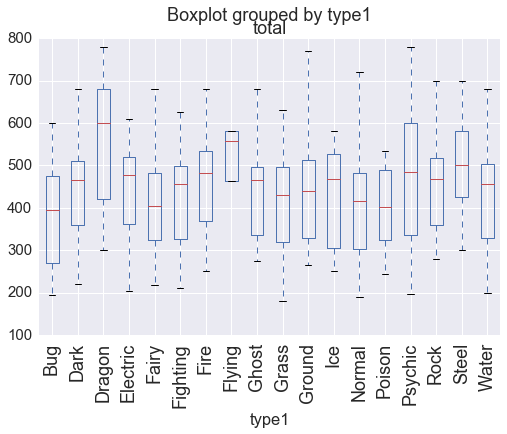

In [68]:
plot_5 = df.boxplot(column='total', by='type1', rot=90)
plot_5;

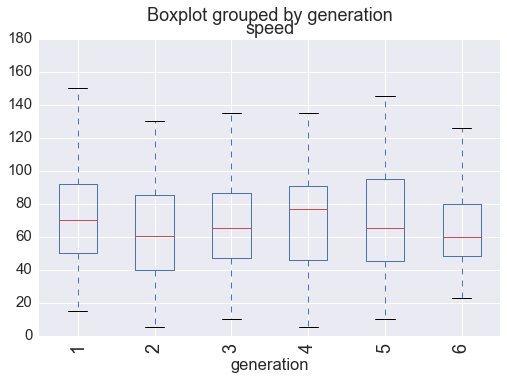

In [77]:
plot_6 = df.boxplot(column='speed', by='generation', rot=90)
plot_6;